<table align="left" width=100%>
    <tr>
        <td width="5%">
            
<td>
            <div align="center">
                <font color="#21618C" size=7px>
                  <b>Personalized Nutrition Recommendation System
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

In today's fast-paced world, maintaining a healthy lifestyle is challenging due to a lack of personalized nutritional guidance. Each individual has unique dietary requirements influenced by their physical attributes (e.g., age, weight, height) and dietary preferences. There is a growing need for a system that not only calculates an individual's health status using BMI (Body Mass Index) but also provides tailored food recommendations to promote a balanced diet.

The Nutrition Recommendation System aims to address this gap by utilizing machine learning to analyze user inputs and recommend suitable food items based on their BMI category. This system will:

Calculate the BMI of the user and classify it into three categories:

Underweight
Normal
Overweight
Recommend healthy food items based on the user's:

This solution will empower users to make informed dietary choices, leading to better health outcomes and a more sustainable approach to nutrition.

## Data Definaton
The dataset consists of various food items along with their nutritional information and meal preferences. Here are the columns and their descriptions:

**Food_items:** The name of the food item.

**Breakfast:** Indicates if the item is typically consumed for breakfast (1 for Yes, 0 for No).

**Lunch:** Indicates if the item is typically consumed for lunch (1 for Yes, 0 for No).

**Dinner:** Indicates if the item is typically consumed for dinner (1 for Yes, 0 for No).

**VegNovVeg:** Indicates if the item is vegetarian (0 for Veg, 1 for Non-Veg).

**Calories:** The number of calories in the food item.

**Fats:** The amount of fats in grams.

**Proteins:** The amount of proteins in grams.

**Iron:** The amount of iron in milligrams.

**Calcium:** The amount of calcium in milligrams.

**Sodium:** The amount of sodium in milligrams.

**Potassium:** The amount of potassium in milligrams.

**Carbohydrates:** The amount of carbohydrates in grams.

**Fibre:** The amount of fiber in grams.

**VitaminD:** The amount of vitamin D in micrograms.

**Sugars:** The amount of sugars in gramsamount of sugars in grams.

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - **[Understand the Dataset](#Data_Understanding)**
        - 4.1.1 - **[Data Type](#Data_Types)**
        - 4.1.2 - **[Summary Statistics](#Summary_Statistics)**
        - 4.1.3 - **[Distribution of Variables](#distribution_variables)**
        - 4.1.4 - **[Correlation](#correlation)**
        - 4.1.5 - **[Discover Outliers](#outliers)**
        - 4.1.6 - **[Missing Values](#Missing_Values)**      
    - 4.2 - **[Prepare the Data](#Data_Preparation)**
5. **[Model Building](#ModelBuilding)**
    - 5.1 - **[Decision Tree](#DecisionTreeWFS)**
    - 5.2 - **[Random Forest](#RandomForest)**
    - 5.3 - **[ANN Model](#ANNModel)**
6. **[Conclusion](#conclusion)**
7. **[Creating User Defined Function](#UserDefined)**
    - 7.1 - **[Function to calculate BMI and its category](#BMI)**
    - 7.2 - **[Function to filter food by meal type](#MealType)**
    - 7.3 - **[Function to recommend diet based on BMI status](#BMIStatus)**
    - 7.4 - **[Main function for BMI calculation and food recommendation](#Main)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [618]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz

import statsmodels
import statsmodels.api as sm

In [620]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [624]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [626]:
os.chdir(r'F:\Imarticus\Capstone2\Project1\Dataset')

<a id='RD'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [701]:
# read the csv data file 
raw = pd.read_csv("food.csv")

# display the top 5 rows of the dataframe
raw.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3
1,Avocados,1,0,0,0,160,15.0,2.0,0.55,12.0,7,485.0,8.5,6.7,0,0.7
2,Bananas,1,0,0,0,89,0.3,1.1,0.26,5.0,1,358.0,23.0,2.6,0,12.0
3,Bagels made in wheat,0,1,1,0,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1
4,Berries,1,0,0,0,349,0.4,14.0,6.80,190.0,298,77.0,77.0,13.0,0,46.0


#### Dimensions of the data

In [704]:
# 'shape' function gives the total number of rows and columns in the data
raw.shape

(91, 16)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

**1. Check for the data type**

In [711]:
raw.dtypes

Food_items        object
Breakfast          int64
Lunch              int64
Dinner             int64
VegNovVeg         object
Calories           int64
Fats             float64
Proteins         float64
Iron             float64
Calcium          float64
Sodium             int64
Potassium        float64
Carbohydrates    float64
Fibre            float64
VitaminD           int64
Sugars           float64
dtype: object

The 'VegNonVeg' column is currently of object data type, but it should be an integer. Therefore, I am converting the object data type to an integer for consistency and proper analysis.

In [714]:
#There is some space in the column removing the space with zero
raw['VegNovVeg'] = raw['VegNovVeg'].replace(' ', '0')

In [716]:
raw['VegNovVeg'] = raw['VegNovVeg'].astype(int)
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Food_items     91 non-null     object 
 1   Breakfast      91 non-null     int64  
 2   Lunch          91 non-null     int64  
 3   Dinner         91 non-null     int64  
 4   VegNovVeg      91 non-null     int32  
 5   Calories       91 non-null     int64  
 6   Fats           91 non-null     float64
 7   Proteins       91 non-null     float64
 8   Iron           91 non-null     float64
 9   Calcium        91 non-null     float64
 10  Sodium         91 non-null     int64  
 11  Potassium      91 non-null     float64
 12  Carbohydrates  91 non-null     float64
 13  Fibre          91 non-null     float64
 14  VitaminD       91 non-null     int64  
 15  Sugars         91 non-null     float64
dtypes: float64(8), int32(1), int64(6), object(1)
memory usage: 11.1+ KB


<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset, we have both numerical and categorical variables. Now we check for summary statistics of all the variables.<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object) 
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use the describe()**

In [721]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Breakfast,91.0,0.461538,0.501280,0.00,0.000,0.00,1.00,1.0
Lunch,91.0,0.494505,0.502740,0.00,0.000,0.00,1.00,1.0
Dinner,91.0,0.692308,0.464095,0.00,0.000,1.00,1.00,1.0
VegNovVeg,91.0,0.197802,0.400549,0.00,0.000,0.00,0.00,1.0
Calories,91.0,213.956044,155.544914,1.00,91.000,187.00,325.00,579.0
Fats,91.0,8.391209,11.325857,0.00,0.300,2.80,12.00,50.0
Proteins,91.0,8.440659,8.785784,0.00,2.350,4.40,13.00,46.0
Iron,91.0,3.667692,8.463383,0.02,0.525,1.25,2.77,57.0
Calcium,91.0,63.393407,111.043736,0.00,8.650,18.00,62.50,631.0
Sodium,91.0,253.417582,319.993613,0.00,8.000,81.00,378.00,1531.0


**2. For categorical variables, use the describe(include=object)**

In [724]:
raw.describe(include='object')

,Food_items
count,91
unique,89
top,Rice Pudding
freq,3


Removing the duplicate rows (Rice Pudding)

In [727]:
raw = raw.drop(raw.tail(2).index)

raw.tail()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
84,Vanilla Ice cream,0,0,1,0,207,11.0,3.5,0.09,128.0,80,199.0,24.0,0.7,0,21.0
85,Strawberry Icecream,0,0,1,0,192,8.4,3.2,0.21,120.0,60,188.0,28.0,0.9,0,0.0
86,Marshmallows,0,0,1,0,318,0.2,1.8,0.23,3.0,80,5.0,81.0,0.1,0,58.0
87,Chocolate milk,1,0,0,0,535,30.0,7.7,2.35,189.0,79,372.0,59.0,3.4,0,52.0
88,Rice Pudding,0,0,1,0,376,0.1,2.7,1.79,14.0,366,5.0,91.0,0.7,0,0.0


<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

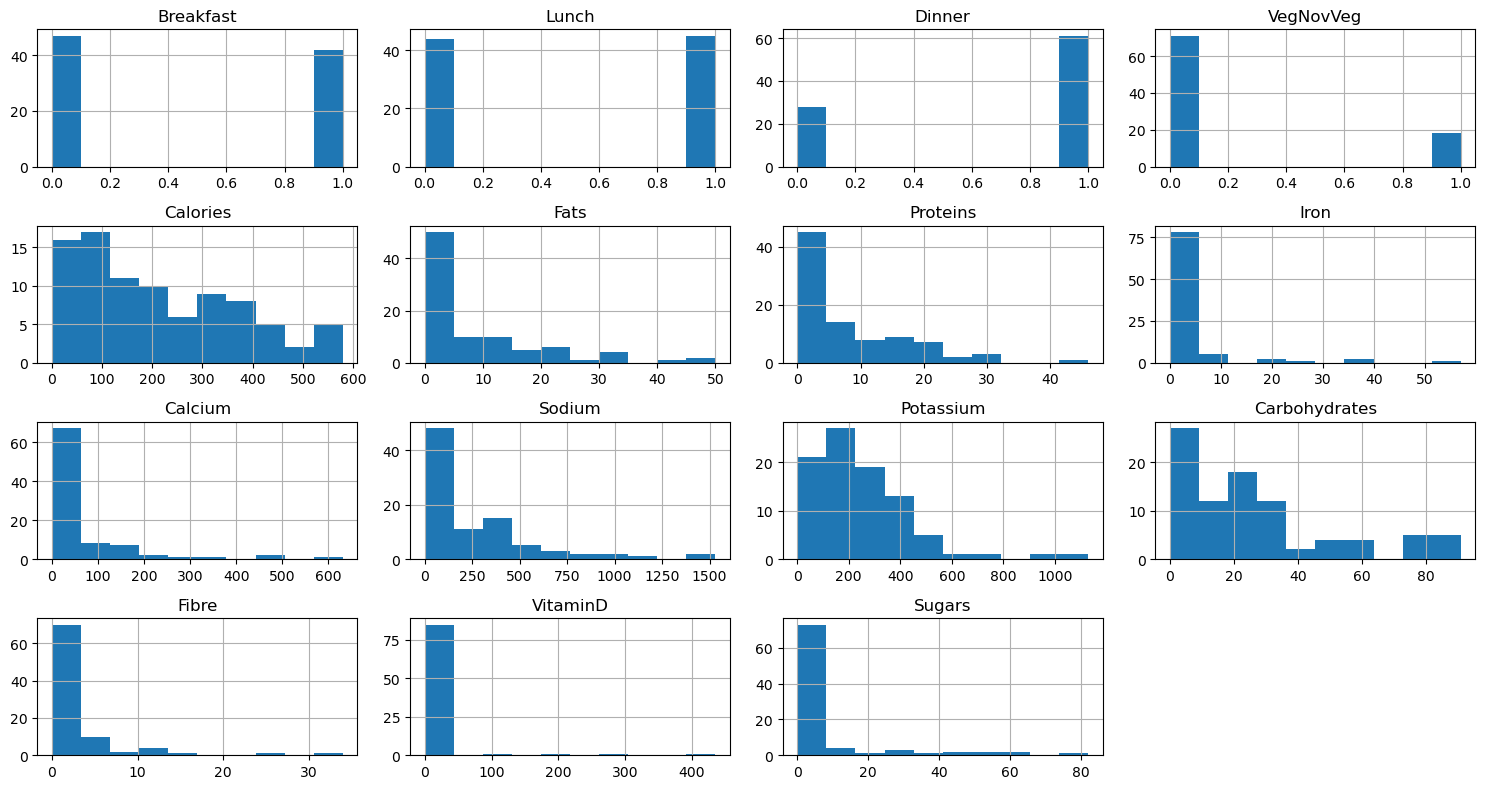

In [732]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
raw.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

#### 2. Create a bar plot for Food_items and Calories.

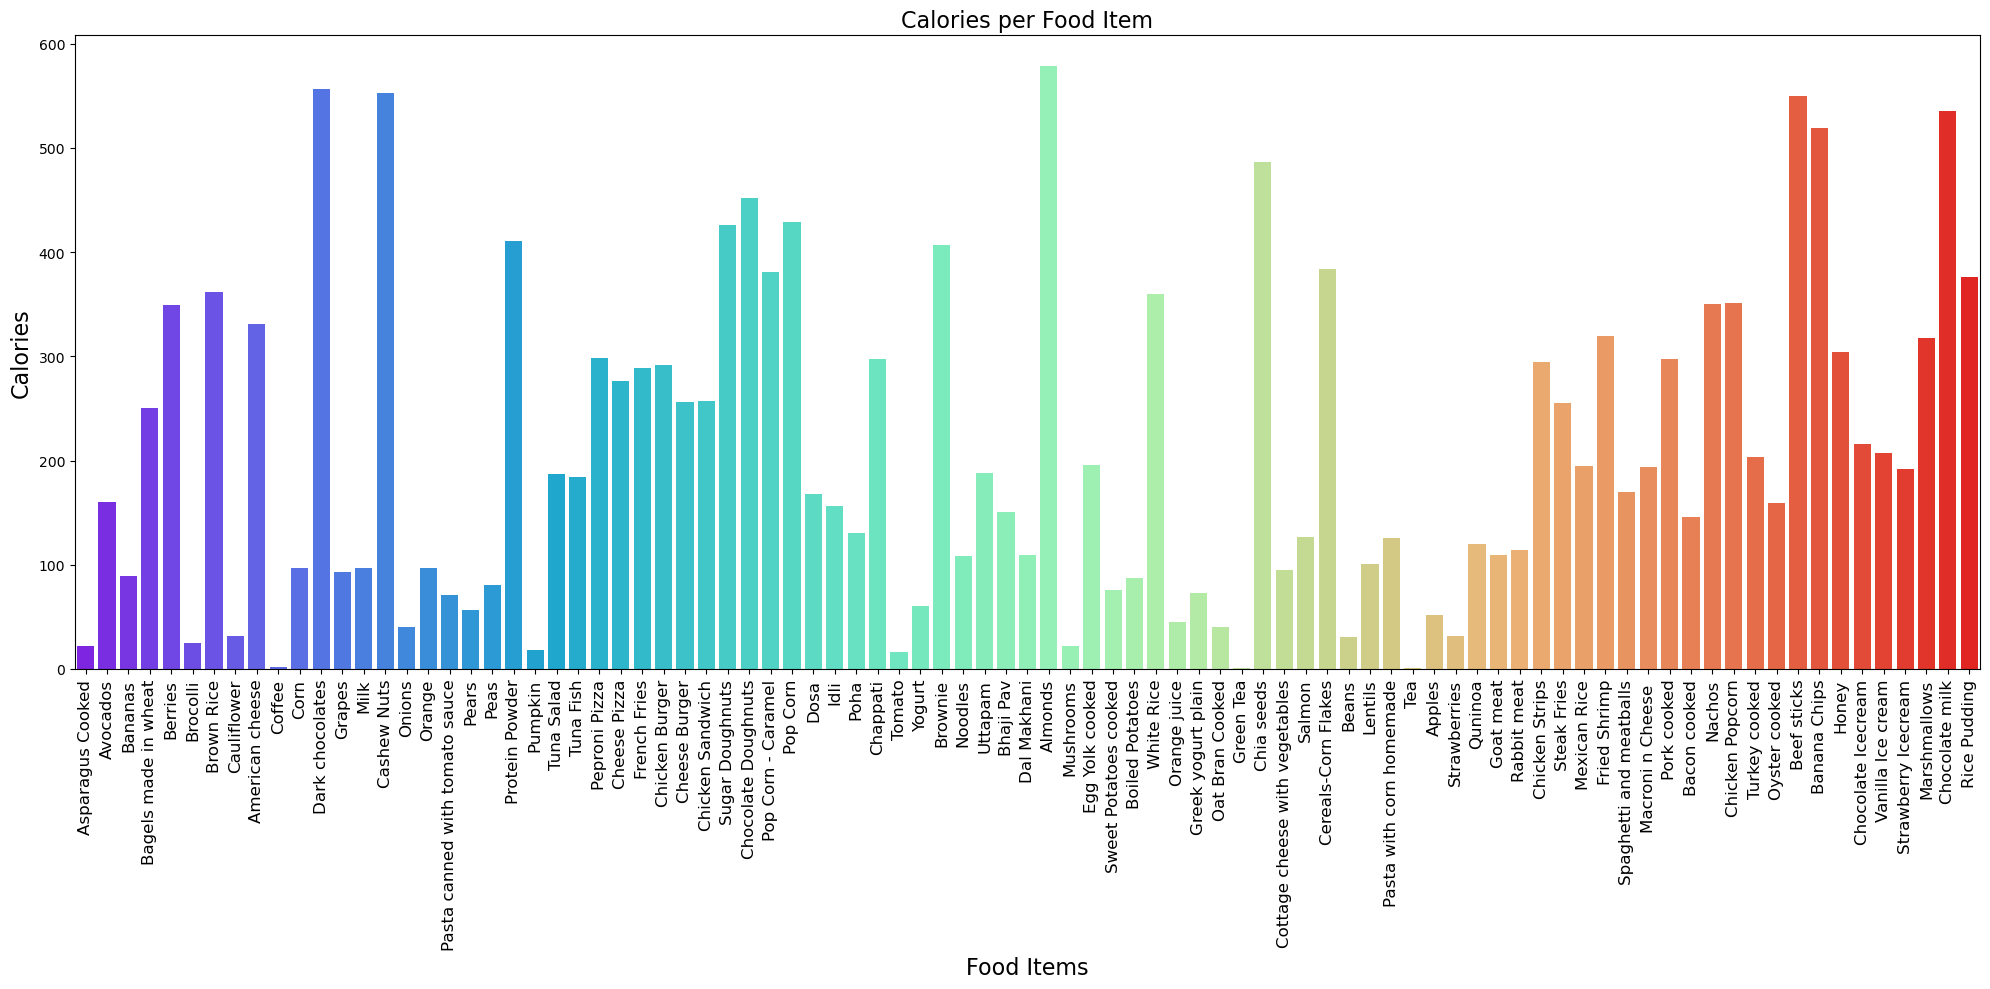

In [735]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Food_items', y='Calories', data=raw, palette='rainbow')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=12)
plt.title('Calories per Food Item', fontsize=16)
plt.xlabel('Food Items', fontsize=16)
plt.ylabel('Calories', fontsize=16)

plt.tight_layout()
plt.show()

<a id='correlation'></a>
### 4.1.4 Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [740]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = raw.corr(numeric_only=True)

# print the correlation matrix
corr

,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
Breakfast,1.000000,-0.415782,-0.716702,-0.363906,0.005943,0.055164,-0.190273,0.039809,0.203502,-0.192711,-0.040698,0.034906,0.285317,0.037663,0.152990
Lunch,-0.415782,1.000000,0.588370,0.050291,-0.299278,-0.252907,-0.077283,0.078693,-0.268526,-0.037623,-0.086073,-0.182675,-0.248113,-0.025733,-0.307073
Dinner,-0.716702,0.588370,1.000000,0.220652,-0.087277,-0.187099,0.039219,-0.032609,-0.286523,0.139371,-0.082287,0.020345,-0.356337,-0.103613,-0.071929
VegNovVeg,-0.363906,0.050291,0.220652,1.000000,0.077021,0.193996,0.626284,-0.121342,-0.163210,0.374500,0.248474,-0.278613,-0.239358,0.154151,-0.228362
Calories,0.005943,-0.299278,-0.087277,0.077021,1.000000,0.780245,0.368758,0.066478,0.302473,0.349808,0.313061,0.623951,0.269969,0.062884,0.408819
Fats,0.055164,-0.252907,-0.187099,0.193996,0.780245,1.000000,0.399935,0.040206,0.368927,0.329089,0.469714,0.063142,0.226484,-0.030662,0.096034
Proteins,-0.190273,-0.077283,0.039219,0.626284,0.368758,0.399935,1.000000,0.025732,0.349457,0.363717,0.585652,-0.164778,0.019971,0.276556,-0.206002
Iron,0.039809,0.078693,-0.032609,-0.121342,0.066478,0.040206,0.025732,1.000000,0.056271,0.114839,-0.028324,0.057814,0.009203,0.085616,-0.070166
Calcium,0.203502,-0.268526,-0.286523,-0.163210,0.302473,0.368927,0.349457,0.056271,1.000000,0.068626,0.339658,-0.016598,0.502670,0.074487,-0.015692
Sodium,-0.192711,-0.037623,0.139371,0.374500,0.349808,0.329089,0.363717,0.114839,0.068626,1.000000,0.059384,0.047273,-0.169633,0.013999,-0.119666


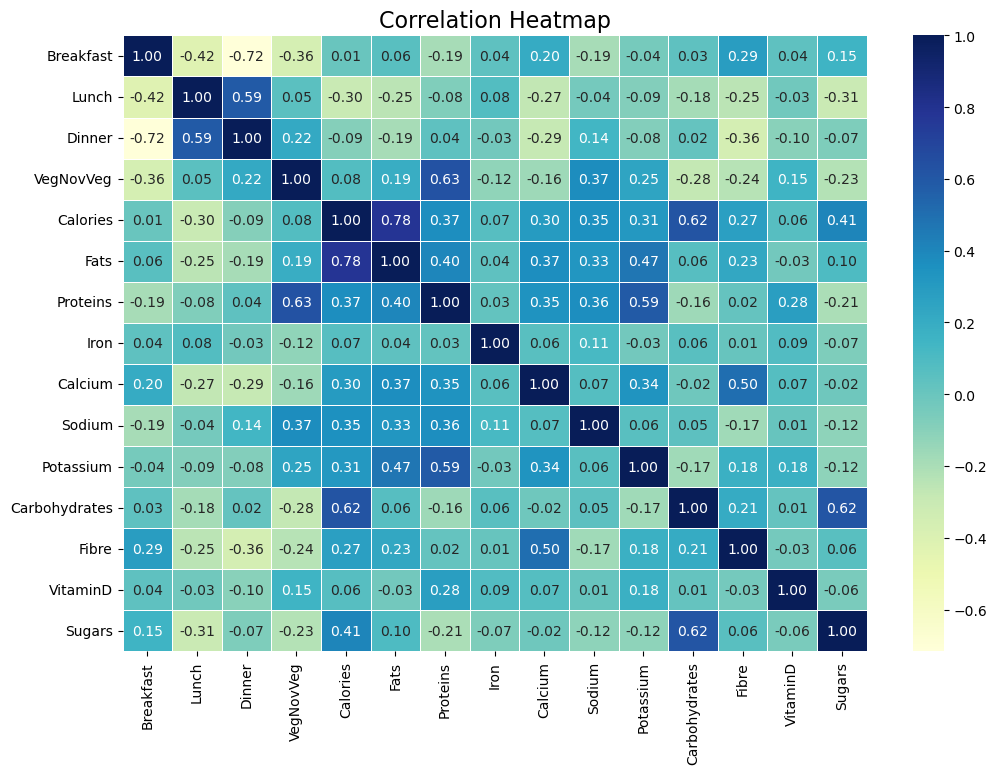

In [742]:
plt.figure(figsize=(12, 8))  # Set the figure size before the heatmap
sns.heatmap(corr, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)

# Add title for better context
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

<a id='outliers'></a>
### 4.1.5 Discover Outliers 

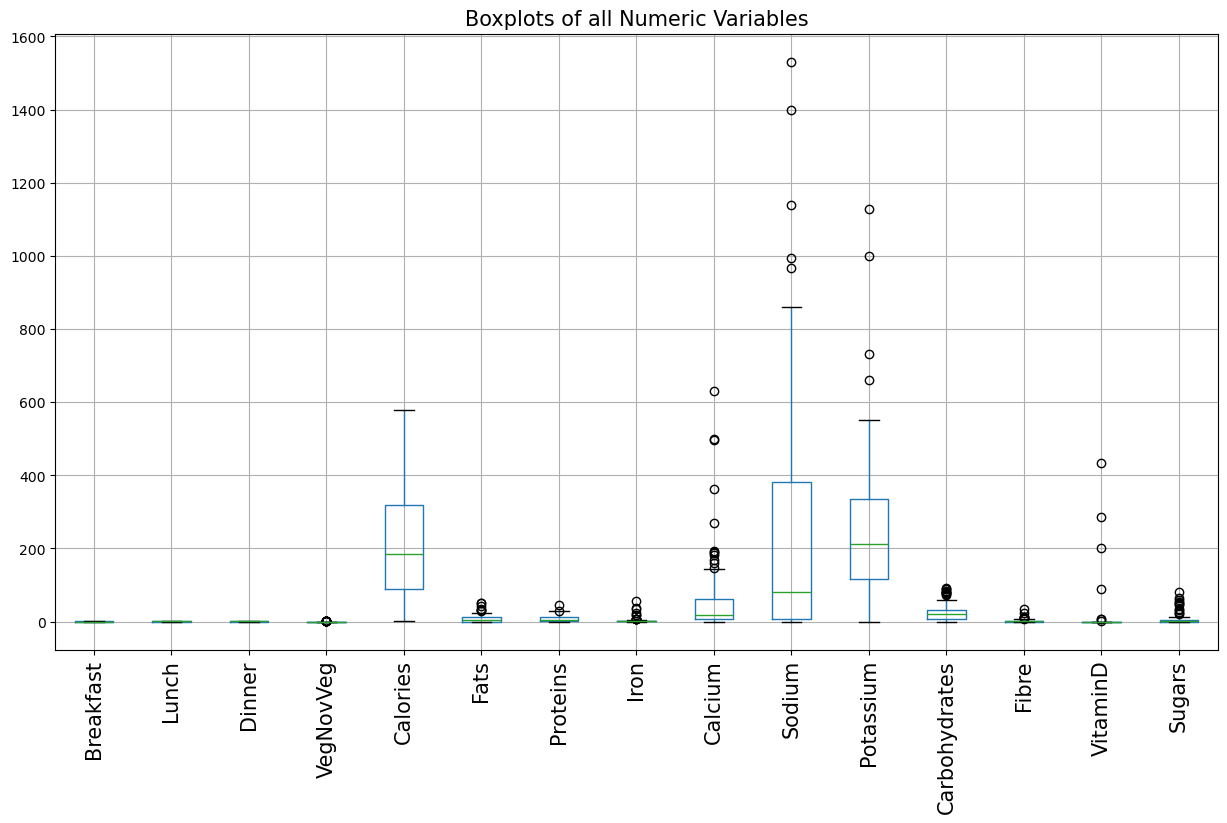

In [744]:
# plot a boxplot to visualize the outliers in all the numeric variables
raw.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Boxplots of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

There is no outliers detect in Calories Column

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

In [747]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = raw.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (raw.isnull().sum()*100/raw.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Food_items,0,0.0
Breakfast,0,0.0
Lunch,0,0.0
Dinner,0,0.0
VegNovVeg,0,0.0
Calories,0,0.0
Fats,0,0.0
Proteins,0,0.0
Iron,0,0.0
Calcium,0,0.0


There is no missing value found

Another way to find the missing values is to plot a heatmap for visualization.

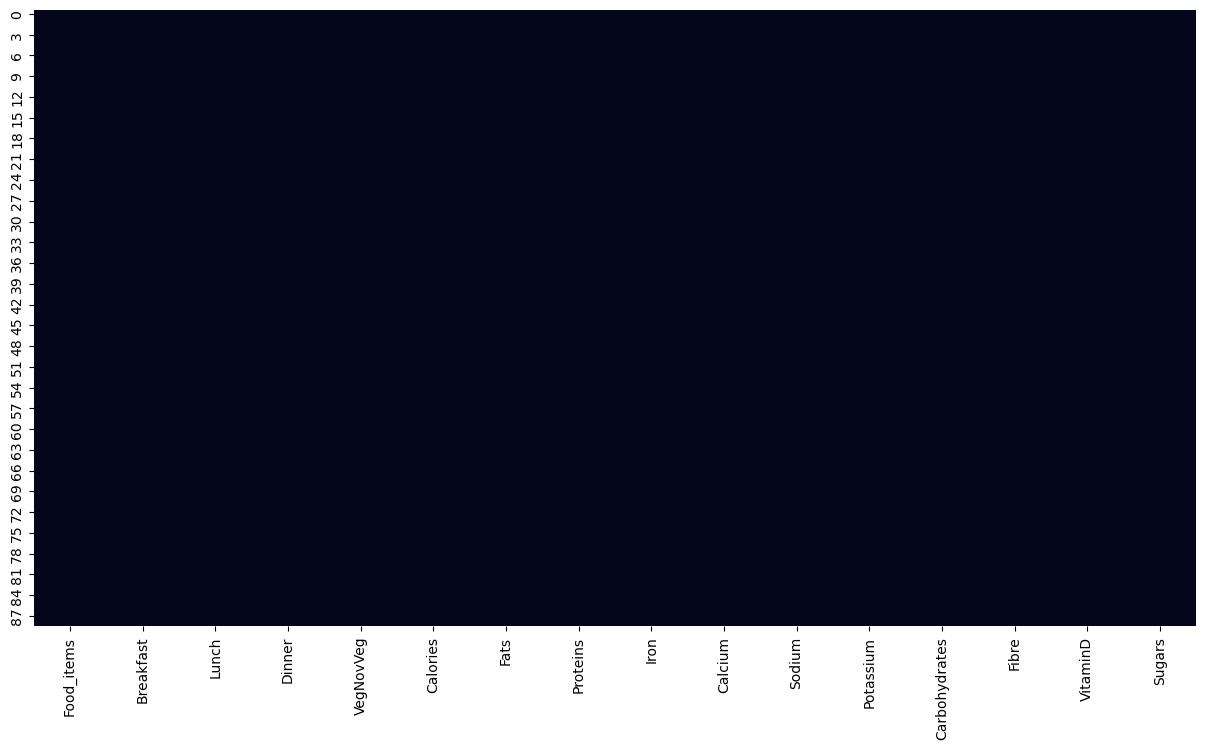

In [753]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(raw.isnull(), cbar=False)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above output shows that there are no missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [756]:
raw.shape

(89, 16)

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

In [759]:
data = raw.copy()
data.head()

,Food_items,Breakfast,Lunch,Dinner,VegNovVeg,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,Asparagus Cooked,0,1,1,0,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3
1,Avocados,1,0,0,0,160,15.0,2.0,0.55,12.0,7,485.0,8.5,6.7,0,0.7
2,Bananas,1,0,0,0,89,0.3,1.1,0.26,5.0,1,358.0,23.0,2.6,0,12.0
3,Bagels made in wheat,0,1,1,0,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1
4,Berries,1,0,0,0,349,0.4,14.0,6.80,190.0,298,77.0,77.0,13.0,0,46.0


Removing columns that is not needed in model building

## Label Encoding for target variable

In [763]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create an instance of LabelEncoder to convert categorical data to numeric
label_encoder = LabelEncoder()
# Encode the 'Food_items' column, converting food names into numeric values
# This is necessary for machine learning models, as they require numerical input.
data['Food_items'] = label_encoder.fit_transform(data['Food_items'])

In [765]:
# Drop the column which is not useful for Model Building
data.drop(['Breakfast', 'Lunch', 'Dinner','VegNovVeg'], axis=1, inplace=True)
data.head()

,Food_items,Calories,Fats,Proteins,Iron,Calcium,Sodium,Potassium,Carbohydrates,Fibre,VitaminD,Sugars
0,3,22,0.2,2.4,0.91,23.0,14,224.0,4.1,2.0,0,1.3
1,4,160,15.0,2.0,0.55,12.0,7,485.0,8.5,6.7,0,0.7
2,8,89,0.3,1.1,0.26,5.0,1,358.0,23.0,2.6,0,12.0
3,6,250,1.5,10.0,2.76,20.0,439,165.0,49.0,4.1,0,6.1
4,11,349,0.4,14.0,6.80,190.0,298,77.0,77.0,13.0,0,46.0


Features and Target varibale defined

In [770]:
X = data.drop(columns=['Food_items']) # Remove 'Food_items' column from the DataFrame to create the feature set.
y = data['Food_items'] # Extract the target variable for prediction.

### Split the dataset into training and test sets

In [773]:
# Splitting the dataset into training and testing sets
# X: Features
# y: Target variable
# test_size=0.2: 20% of the data will be used for testing
# random_state=42: Ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='ModelBuilding'> </a>
# 5. Model Building

<a id='DecisionTreeWFS'> </a>
## 5.1 Decision Tree 

In [777]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree model accuracy: {accuracy * 100:.2f}%')

Decision Tree model accuracy: 0.00%


<a id='RandomForest'></a>
## 5.2 Random Forest 

In [780]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest = RandomForestClassifier(n_estimators=60, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest model accuracy: {accuracy * 100:.2f}%')


Random Forest model accuracy: 0.00%


<a id='ANNModel'> </a>
## 5.3 ANN Model

In [783]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [785]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import  callbacks
from tensorflow.keras.layers import Dense
# Improving the ANN
from tensorflow.keras.layers import Dropout
# Dropout layer is a regularization technique in neural networks that randomly deactivates some neurons during training phase to prevent overfitting 
model1 = Sequential()

# Adding the input layer and the first hidden layer
model1.add(Dense(units = 100, 
                     kernel_initializer = 'uniform', 
                     activation = 'relu', 
                     input_shape = [X_train.shape[1]]))
               

# Adding the second hidden layer
model1.add(Dense(units = 60, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the Third hidden layer
model1.add(Dense(units = 80, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fourth hidden layer
model1.add(Dense(units = 90, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the fifth hidden layer
model1.add(Dense(units = 100, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [787]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 100)                 │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 80)                  │           4,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 90)                  │           7,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 100)                 │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,631 (111.84 KB)

 Trainable params: 28,631 (111.84 KB)

 Non-trainable params: 0 (0.00 B)

In [789]:
# Compiling the ANN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
history = model1.fit(X_train,y_train,
                          batch_size=62 , 
                          epochs=100 , 
                          validation_split=0.1,
                          verbose = 1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - loss: 2487.9546 - val_loss: 2337.3953
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 2474.1467 - val_loss: 2337.2732
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 2458.6787 - val_loss: 2337.1226
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 2482.4094 - val_loss: 2336.9277
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 2477.7793 - val_loss: 2336.6619
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 2491.2339 - val_loss: 2336.3071
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 2487.4309 - val_loss: 2335.8149
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 2483.3235 - val_loss: 2335.0815
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2476.1248 - val_loss: 2333.9971
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 2454.8962 - val_loss: 2332.4629
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 2485.2205 - val_loss: 2330.3179
Epoch 

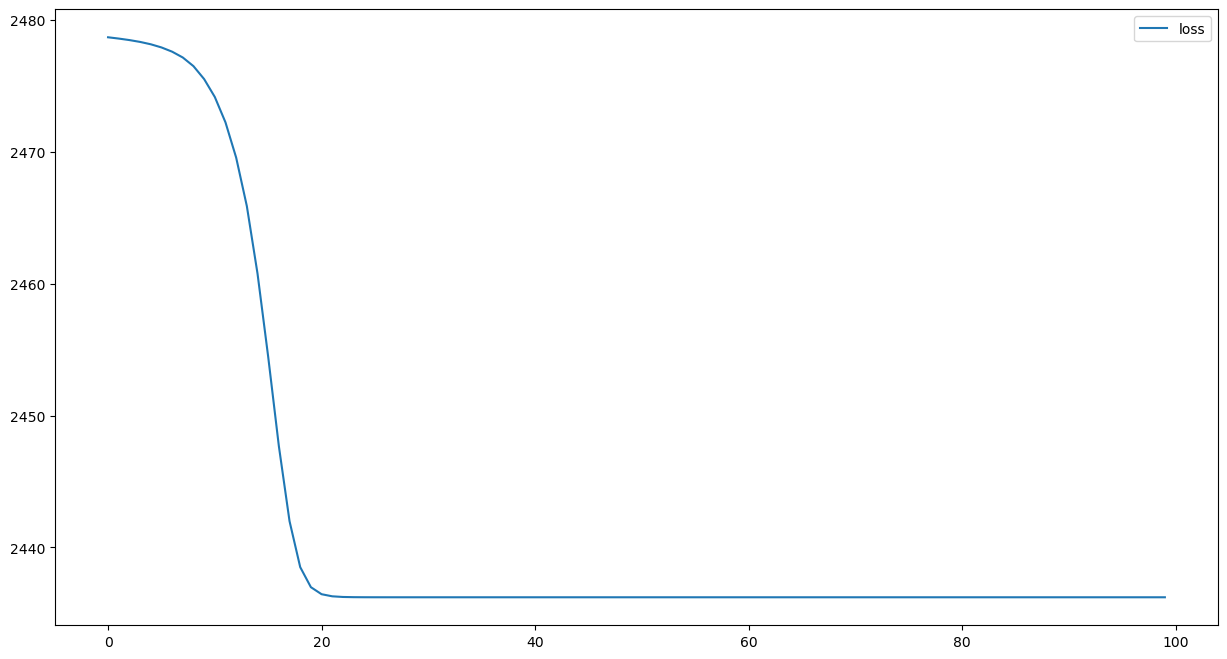

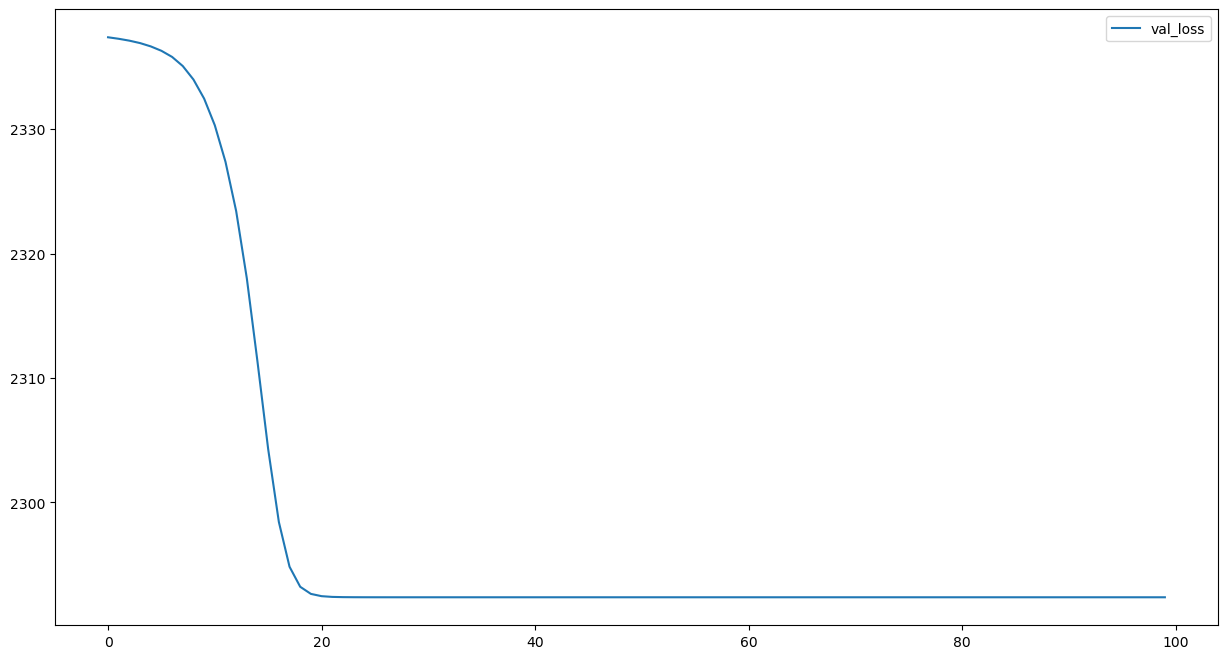

In [790]:
history = pd.DataFrame(history.history)
history.loc[:, ['loss']].plot();
history.loc[:, ['val_loss']].plot();

In [791]:
y_pred = model1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [792]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-2.384664949868998

<a id="conclusion"> </a>
# 6. Conclusion

After building and evaluating three machine learning models — Decision Tree, Random Forest, and ANN — all models yielded an accuracy of zero or less, indicating that the models were unable to learn meaningful patterns from the data. This could be due to imbalanced classes, insufficient data, or misalignment between the dataset and the problem being addressed.

To overcome these limitations, I have decided to create a user-defined function for the food recommendation system. This approach will allow me to leverage domain knowledge and predefined rules based on the nutritional information in the dataset to provide accurate and meaningful recommendations. By bypassing the limitations of machine learning in this scenario, the user-defined function will ensure a functional and effective recommendation system tailored to the dataset's characteristics.

<a id="UserDefined"> </a>
# 7. Creating User Defined Function

<a id='BMI'> </a>
## 7.1 Function to calculate BMI and its category 

In [801]:
# Function to calculate BMI and its category
def calculate_bmi(weight, height):
    bmi = weight / (height / 100) ** 2
    if bmi < 18.5:
        status = "Underweight"
    elif 18.5 <= bmi <= 24.9:
        status = "Normal"
    else:
        status = "Overweight"
    return bmi, status

<a id='MealType'> </a>
## 7.2 Function to filter food by meal type 

In [804]:
def filter_food_by_meal(data, meal_type):
    if meal_type == "Breakfast":
        return data[raw['Breakfast'] == 1]
    elif meal_type == "Lunch":
        return data[raw['Lunch'] == 1]
    elif meal_type == "Dinner":
        return data[raw['Dinner'] == 1]

<a id='BMIStatus'> </a>
## 7.3 Function to recommend diet based on BMI status 

In [807]:
def recommend_diet(filtered_data, status):
    if status == "Underweight":
        return filtered_data[filtered_data['Calories'] > 200].head(3)
    elif status == "Overweight":
        return filtered_data[filtered_data['Calories'] < 150].head(3)
    else:  # Normal BMI
        return filtered_data[(filtered_data['Calories'] >= 150) & (filtered_data['Calories'] <= 250)].head(3)

<a id='Main'> </a>
## 7.4 Main function for BMI calculation and food recommendation

In [812]:
def main():
    # Example user inputs
    weight = float(input("Enter your weight (kg): "))
    height = float(input("Enter your height (cm): "))
    age = int(input("Enter your age (years): "))  
    
    # Calculate BMI and determine the status
    bmi, status = calculate_bmi(weight, height)
    print(f"\nBMI: {bmi:.2f}, Status: {status}, Age: {age}")  # Print age along with BMI and status
    
    # Generate food recommendations
    print("\nFood Recommendations:")
    print("Breakfast:")
    breakfast = recommend_diet(filter_food_by_meal(raw, "Breakfast"), status)
    print(breakfast[['Food_items', 'Calories']].to_string(index=False))
    
    print("\nLunch:")
    lunch = recommend_diet(filter_food_by_meal(raw, "Lunch"), status)
    print(lunch[['Food_items', 'Calories']].to_string(index=False))
    
    print("\nDinner:")
    dinner = recommend_diet(filter_food_by_meal(raw, "Dinner"), status)
    print(dinner[['Food_items', 'Calories']].to_string(index=False))

# Run the main function
main()


Enter your weight (kg):  50
Enter your height (cm):  156
Enter your age (years):  25



BMI: 20.55, Status: Normal, Age: 25

Food Recommendations:
Breakfast:
Food_items  Calories
  Avocados       160
      Dosa       168
      Idli       156

Lunch:
          Food_items  Calories
Bagels made in wheat       250
          Tuna Salad       187
                Dosa       168

Dinner:
          Food_items  Calories
Bagels made in wheat       250
          Tuna Salad       187
           Tuna Fish       184
